# Cuaderno que obtiene los atributos del partido junto a la variable is on court

In [1]:
import pandas as pd

In [2]:
ACTIVITY_LOAD_DATASET_FILE_DIR = '../../datasets/first-study/activity_load.csv'
HR_DATASET_FILE_DIR = '../../datasets/hr-study/hr_without_gaps.csv'
PLAYER_IS_ON_COURT_DATASET_FILE_DIR = '../../datasets/play-by-play-study/is_player_on_court.csv'

In [3]:
hr = pd.read_csv(HR_DATASET_FILE_DIR,index_col=0)
hr.head()

,seconds,date,hr,diff,gap
0,126.304,2023-04-23 18:10:38.770,75.0,NaN,0.0
1,126.804,2023-04-23 18:10:38.770,75.0,0.5,0.0
2,127.304,2023-04-23 18:10:38.770,75.0,0.5,0.0
3,127.804,2023-04-23 18:10:38.770,75.0,0.5,0.0
4,128.304,2023-04-23 18:10:38.770,75.0,0.5,0.0


In [4]:
activity_load = pd.read_csv(ACTIVITY_LOAD_DATASET_FILE_DIR)
activity_load.head()

,seconds,date,activity_load_2d,activity_load_3d
0,1.802,2023-04-23 18:10:39.569,0.0683,0.0928
1,2.802,2023-04-23 18:10:40.569,0.0850,0.1123
2,3.802,2023-04-23 18:10:41.569,0.0588,0.0710
3,4.802,2023-04-23 18:10:42.569,0.0267,0.0356
4,5.802,2023-04-23 18:10:43.569,0.0489,0.0677


Los datasets tienen distinto número de registros

In [5]:
print(f'Número de registros de HR: {len(hr)}')

Número de registros de HR: 21689


In [6]:
print(f'Número de registros de ActivityLoad: {len(activity_load)}')

Número de registros de ActivityLoad: 10942


El número cuadra, es casi el doble.

Coger los datos desde el inicio de partido

Hay que indicar cuando empieza el partido

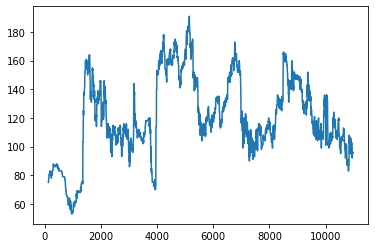

In [7]:
import matplotlib.pyplot as plt

x = hr['seconds']
y = hr['hr']

# Crear una figura y ejes
fig, ax = plt.subplots()
ax.plot(x, y, linestyle='-')

Segundo en el que empieza el partido

In [8]:
match_start = 3262

In [9]:
activity_match = activity_load[activity_load['seconds']>match_start]
activity_match.reset_index(inplace=True)
activity_match

,index,seconds,date,activity_load_2d,activity_load_3d
0,3252,3262.354,2023-04-23 19:05:00.121,0.0218,0.0352
1,3253,3263.354,2023-04-23 19:05:01.121,0.0310,0.0393
2,3254,3264.354,2023-04-23 19:05:02.121,0.0232,0.0340
3,3255,3265.354,2023-04-23 19:05:03.121,0.0202,0.0263
4,3256,3266.354,2023-04-23 19:05:04.121,0.0228,0.0259
...,...,...,...,...,...
7685,10937,10967.689,2023-04-23 21:13:25.456,0.0434,0.0504
7686,10938,10968.689,2023-04-23 21:13:26.456,0.0108,0.0138
7687,10939,10969.689,2023-04-23 21:13:27.456,0.0074,0.0092
7688,10940,10970.689,2023-04-23 21:13:28.456,0.0049,0.0060


De hr, tan solo se coge la mitad del dataset, ya que hay el doble de valores que en activity load, y por su frecuencia, no pasa nada por coger solo los valores cada segundo, no se perderá información.

In [10]:
hr_match = hr.iloc[hr.index % 2 == 0][hr['seconds']>match_start]
hr_match.reset_index(inplace=True)
hr_match

/tmp/ipykernel_12008/955440834.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  hr_match = hr.iloc[hr.index % 2 == 0][hr['seconds']>match_start]


,index,seconds,date,hr,diff,gap
0,6272,3262.304,2023-04-23 18:10:38.770,113.0,0.5,0.0
1,6274,3263.304,2023-04-23 18:10:38.770,112.0,0.5,0.0
2,6276,3264.304,2023-04-23 18:10:38.770,112.0,0.5,0.0
3,6278,3265.304,2023-04-23 18:10:38.770,112.0,0.5,0.0
4,6280,3266.304,2023-04-23 18:10:38.770,112.0,0.5,0.0
...,...,...,...,...,...,...
7703,1240114,10962.804,2023-04-23 18:10:38.770,96.0,0.5,0.0
7704,1240342,10964.804,2023-04-23 18:10:38.770,96.0,0.5,0.0
7705,1240676,10967.804,2023-04-23 18:10:38.770,96.0,0.5,0.0
7706,1240842,10969.304,2023-04-23 18:10:38.770,96.0,0.5,0.0


In [11]:
hr_match['activity_load_2d'] = activity_match['activity_load_2d']

In [12]:
hr_match['activity_load_3d'] = activity_match['activity_load_3d']

In [13]:
hr_match

,index,seconds,date,hr,diff,gap,activity_load_2d,activity_load_3d
0,6272,3262.304,2023-04-23 18:10:38.770,113.0,0.5,0.0,0.0218,0.0352
1,6274,3263.304,2023-04-23 18:10:38.770,112.0,0.5,0.0,0.0310,0.0393
2,6276,3264.304,2023-04-23 18:10:38.770,112.0,0.5,0.0,0.0232,0.0340
3,6278,3265.304,2023-04-23 18:10:38.770,112.0,0.5,0.0,0.0202,0.0263
4,6280,3266.304,2023-04-23 18:10:38.770,112.0,0.5,0.0,0.0228,0.0259
...,...,...,...,...,...,...,...,...
7703,1240114,10962.804,2023-04-23 18:10:38.770,96.0,0.5,0.0,NaN,NaN
7704,1240342,10964.804,2023-04-23 18:10:38.770,96.0,0.5,0.0,NaN,NaN
7705,1240676,10967.804,2023-04-23 18:10:38.770,96.0,0.5,0.0,NaN,NaN
7706,1240842,10969.304,2023-04-23 18:10:38.770,96.0,0.5,0.0,NaN,NaN


In [14]:
hr_match.drop(['index', 'diff', 'gap'],axis=1, inplace=True)

In [15]:
hr_match.head()

,seconds,date,hr,activity_load_2d,activity_load_3d
0,3262.304,2023-04-23 18:10:38.770,113.0,0.0218,0.0352
1,3263.304,2023-04-23 18:10:38.770,112.0,0.0310,0.0393
2,3264.304,2023-04-23 18:10:38.770,112.0,0.0232,0.0340
3,3265.304,2023-04-23 18:10:38.770,112.0,0.0202,0.0263
4,3266.304,2023-04-23 18:10:38.770,112.0,0.0228,0.0259


Ahora hay que añadir la etiqueta de si está en pista o no

In [16]:
player_is_on_court = pd.read_csv(PLAYER_IS_ON_COURT_DATASET_FILE_DIR,index_col=0)
player_is_on_court

,seconds,is_on_court,event,assist,offense_player,defense_player
0,1.0,0.0,NaN,NaN,NaN,NaN
1,2.0,0.0,NaN,NaN,NaN,NaN
2,3.0,0.0,NaN,NaN,NaN,NaN
3,4.0,0.0,NaN,NaN,NaN,NaN
4,5.0,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
4864,4865.0,1.0,NaN,NaN,NaN,NaN
4865,4866.0,1.0,NaN,NaN,NaN,NaN
4866,4867.0,1.0,NaN,NaN,NaN,NaN
4867,4868.0,1.0,NaN,NaN,NaN,NaN


Una vez se tiene esta lista, se debe introducir como etiqueta

In [17]:
values_to_complete = len(hr_match) - len(player_is_on_court)

In [18]:
print(f'Hay que añadir {values_to_complete} valores nulos')

Hay que añadir 2839 valores nulos


In [19]:
is_on_court_list = list(player_is_on_court['is_on_court'])

In [20]:
for i in range(0,values_to_complete):
    is_on_court_list.append(None)

In [21]:
hr_match['IsOnCourt'] = is_on_court_list

Se eliminan los valores nulos

In [22]:
hr_match = hr_match[~hr_match['IsOnCourt'].isnull()]

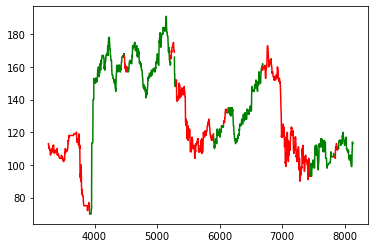

In [23]:
import matplotlib.pyplot as plt

colores = {0: 'red', 1: 'green', None: 'black'}
x = hr_match['seconds']
y = hr_match['hr']

valores_convertidos = [colores[valor] for valor in hr_match['IsOnCourt']]

# Crear una figura y ejes
fig, ax = plt.subplots()

# Initialize variables for segment plotting
segment_start = 0
current_color = valores_convertidos[0]

# Iterate through the data to plot segments with different colors
for i in range(1, len(x)):
    if valores_convertidos[i] != current_color:
        # Plot the current segment with the current color
        ax.plot(x[segment_start:i], y[segment_start:i], linestyle='-', color=current_color)
        
        # Update the segment start and current color
        segment_start = i
        current_color = valores_convertidos[i]

# Plot the last segment
ax.plot(x[segment_start:], y[segment_start:], linestyle='-', color=current_color)

plt.show()

Se puede ver como ha ido progresando el ritmo cardíaco cuando está o no en pista. Se puede ver que se ha ajustado bastante bien los valores, aún así, es una tarea muy compleja, y se puede simplificar utilizando aprendizaje supervisado.

In [118]:
hr_match.to_csv('../../datasets/play-by-play-study/match_attributes.csv')